In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_recall_curve, auc, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [8]:
X = data.drop(columns='Class', axis=1)
Y = data['Class']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_non_fraud = non_fraud.drop(columns='Class', axis=1)
X_non_fraud_scaled = scaler.fit_transform(X_non_fraud)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

In [16]:
X_non_fraud = X_resampled[Y_resampled == 0]

AUC-PR: 0.46


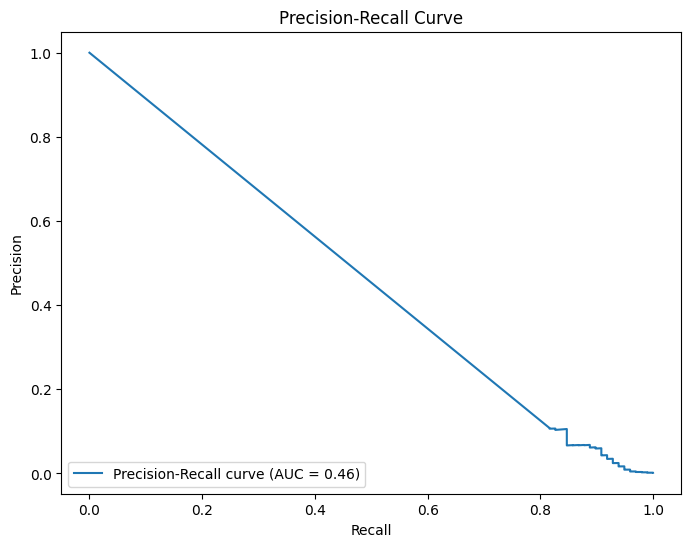

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



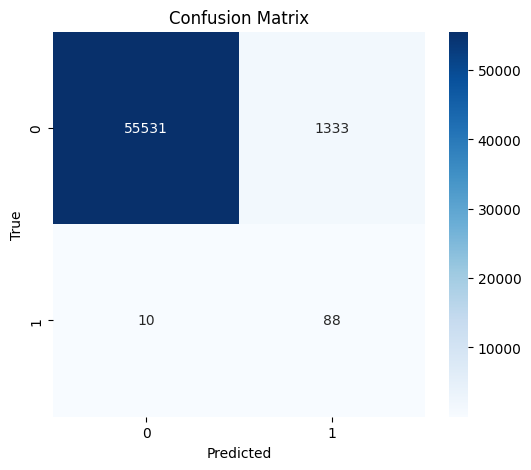

In [19]:
## Naive Bayes

model1 = GaussianNB()
model1.fit(X_resampled, Y_resampled)

probabilities = model1.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, probabilities)

auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Y_pred = model1.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-PR: 0.79


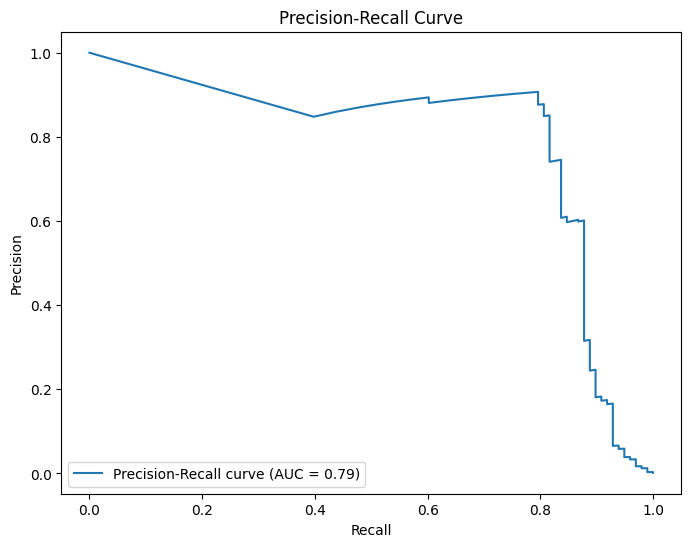

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.95      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962



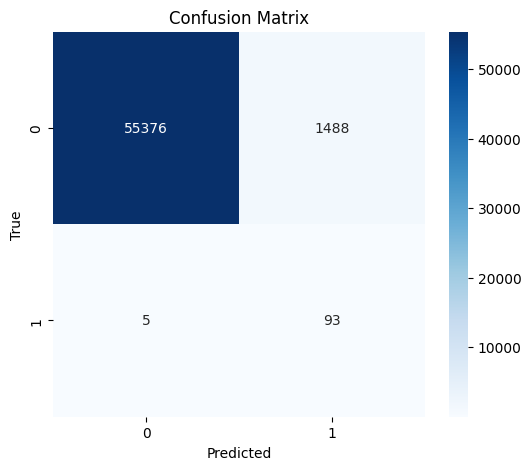

In [ ]:
## Logistic Regression

model2 = LogisticRegression(class_weight='balanced', random_state=2)
model2.fit(X_resampled, Y_resampled)

probabilities = model2.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, probabilities)

auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Y_pred = model2.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-PR: 0.61


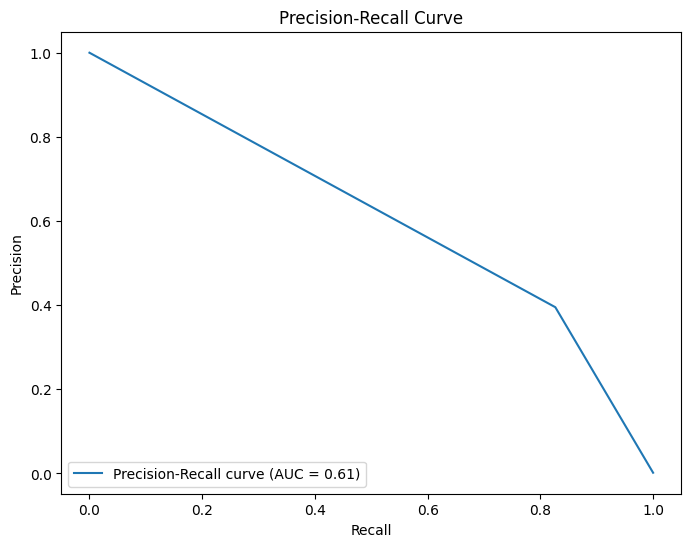

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.83      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.91      0.77     56962
weighted avg       1.00      1.00      1.00     56962



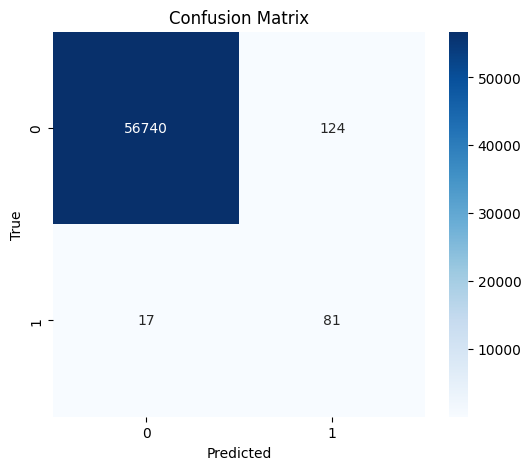

In [ ]:
## Decision Tree

model3 = DecisionTreeClassifier(class_weight="balanced", random_state=42)
model3.fit(X_resampled, Y_resampled)

probabilities = model3.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, probabilities)

auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Y_pred = model3.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
## Isolation Forest

# Modify hyperparameter grid for broader search
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_samples': [0.3, 0.5, 0.7, 1.0],
    'max_features': [0.3, 0.5, 0.7, 1.0],
    'contamination': [0.01, 0.015, 0.02]  # Tune contamination rate
}

best_auc_pr = 0
best_params = None
model4 = None

# Perform Grid Search
for n_estimators in param_grid['n_estimators']:
    for max_samples in param_grid['max_samples']:
        for max_features in param_grid['max_features']:
            for contamination in param_grid['contamination']:
                model = IsolationForest(
                    n_estimators=n_estimators,
                    max_samples=max_samples,
                    max_features=max_features,
                    contamination=contamination,
                    random_state=42
                )
                model.fit(X_resampled)

                test_predictions = model.predict(X_test)
                test_predictions = np.where(test_predictions == -1, 1, 0)

                precision, recall, _ = precision_recall_curve(Y_test, test_predictions)
                auc_pr = auc(recall, precision)

                print(f"Params: n_estimators={n_estimators}, max_samples={max_samples}, max_features={max_features}, contamination={contamination}, AUC-PR={auc_pr:.4f}")

                if auc_pr > best_auc_pr:
                    best_auc_pr = auc_pr
                    best_params = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features, 'contamination': contamination}
                    model4 = model

print("\nBest Parameters:", best_params)
print("Best AUC-PR:", best_auc_pr)

Params: n_estimators=50, max_samples=0.3, max_features=0.3, contamination=0.01, AUC-PR=0.0632
Params: n_estimators=50, max_samples=0.3, max_features=0.3, contamination=0.015, AUC-PR=0.0998
Params: n_estimators=50, max_samples=0.3, max_features=0.3, contamination=0.02, AUC-PR=0.1151
Params: n_estimators=50, max_samples=0.3, max_features=0.5, contamination=0.01, AUC-PR=0.0881
Params: n_estimators=50, max_samples=0.3, max_features=0.5, contamination=0.015, AUC-PR=0.1163
Params: n_estimators=50, max_samples=0.3, max_features=0.5, contamination=0.02, AUC-PR=0.1123
Params: n_estimators=50, max_samples=0.3, max_features=0.7, contamination=0.01, AUC-PR=0.0943
Params: n_estimators=50, max_samples=0.3, max_features=0.7, contamination=0.015, AUC-PR=0.1006
Params: n_estimators=50, max_samples=0.3, max_features=0.7, contamination=0.02, AUC-PR=0.1029
Params: n_estimators=50, max_samples=0.3, max_features=1.0, contamination=0.01, AUC-PR=0.0661
Params: n_estimators=50, max_samples=0.3, max_features=1.

AUC-PR: 0.14


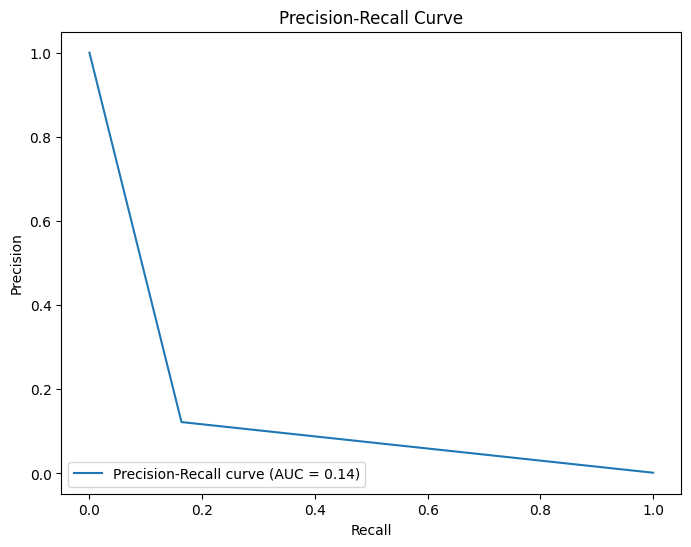

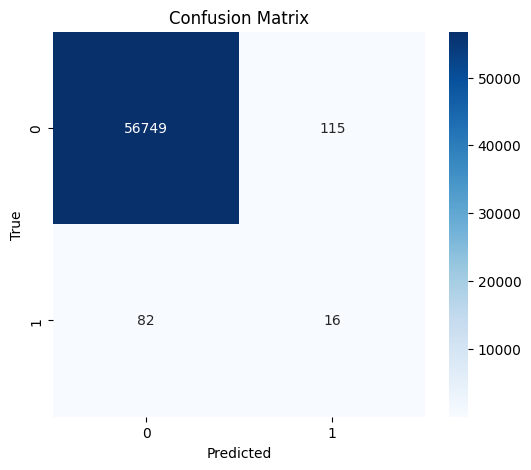

In [31]:
test_predictions = model4.predict(X_test)
test_predictions = np.where(test_predictions == -1, 1, 0) 

precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

cm = confusion_matrix(Y_test, test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-PR: 0.47


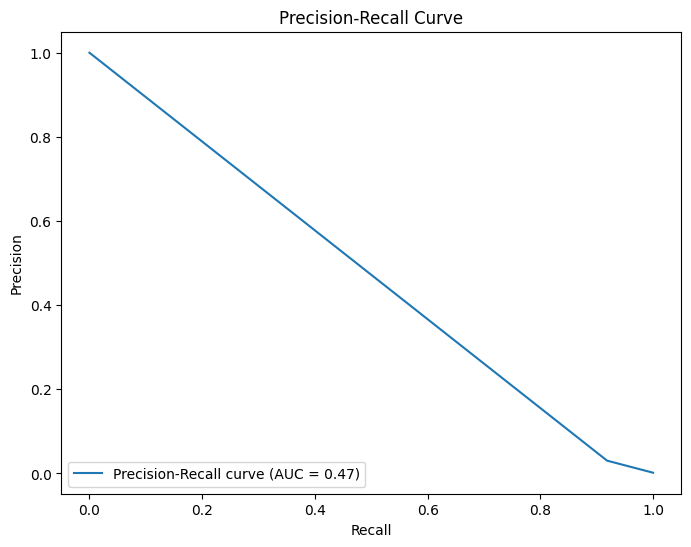

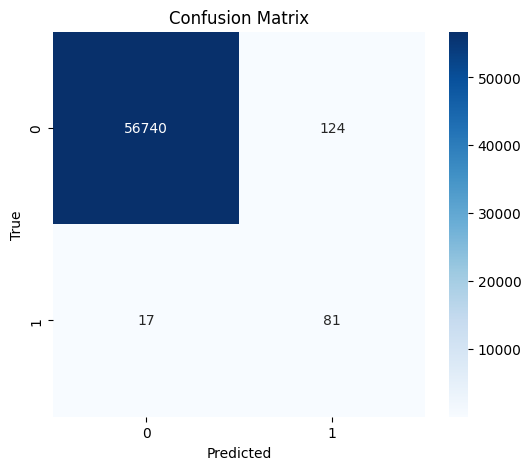

In [ ]:
## One Class SVM

model5 = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.05)
model5.fit(X_non_fraud)

test_predictions = model5.predict(X_test)
test_predictions = np.where(test_predictions == -1, 1, 0)

precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Params: nu=0.01, gamma=0.001, AUC-PR=0.4159
Params: nu=0.01, gamma=0.01, AUC-PR=0.4920
Params: nu=0.01, gamma=0.1, AUC-PR=0.5288
Params: nu=0.05, gamma=0.001, AUC-PR=0.4759
Params: nu=0.05, gamma=0.01, AUC-PR=0.4759
Params: nu=0.05, gamma=0.1, AUC-PR=0.4791
Params: nu=0.1, gamma=0.001, AUC-PR=0.4833
Params: nu=0.1, gamma=0.01, AUC-PR=0.4833
Params: nu=0.1, gamma=0.1, AUC-PR=0.4938

Best Parameters: {'nu': 0.01, 'gamma': 0.1}
Best AUC-PR: 0.5288390025800458


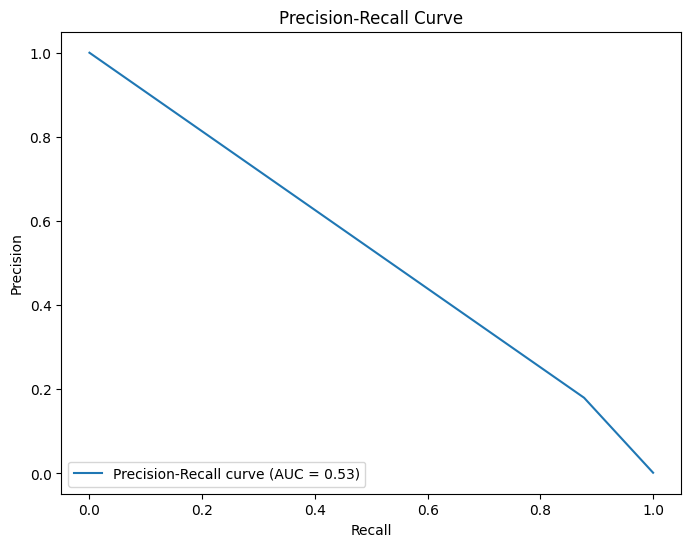

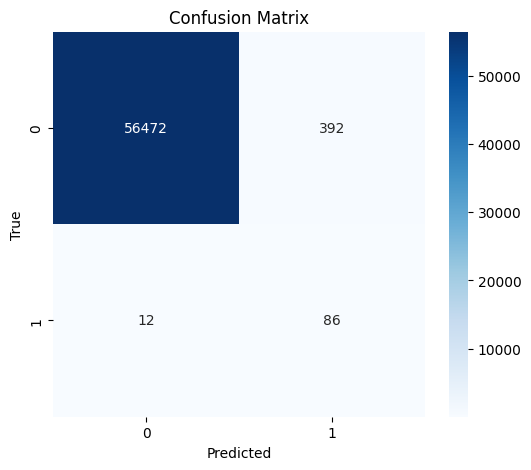

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.88      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
# Define hyperparameter grid
param_grid = {
    'nu': [0.01, 0.05, 0.1],  # Proportion of anomalies in the training data
    'gamma': [0.001, 0.01, 0.1]  # Kernel coefficient
}

# Best parameters tracker
best_auc_pr = 0
best_params = None
best_model = None

# Perform manual grid search
for nu in param_grid['nu']:
    for gamma in param_grid['gamma']:
        # Train One-Class SVM
        model = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
        model.fit(X_non_fraud_scaled)  # Train only on non-fraud data

        # Predict on the test set
        test_predictions = model.predict(X_test)
        test_predictions = np.where(test_predictions == -1, 1, 0)  # Convert -1 to 1 (fraud), 1 to 0 (non-fraud)

        # Calculate AUC-PR
        precision, recall, _ = precision_recall_curve(Y_test, test_predictions)
        auc_pr = auc(recall, precision)

        print(f"Params: nu={nu}, gamma={gamma}, AUC-PR={auc_pr:.4f}")

        # Track the best model
        if auc_pr > best_auc_pr:
            best_auc_pr = auc_pr
            best_params = {'nu': nu, 'gamma': gamma}
            best_model = model

# Output the best parameters
print("\nBest Parameters:", best_params)
print("Best AUC-PR:", best_auc_pr)

# Evaluate the best model
test_predictions = best_model.predict(X_test)
test_predictions = np.where(test_predictions == -1, 1, 0)

# Precision-Recall Curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
auc_pr = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
cm = confusion_matrix(Y_test, test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90     56864
           1       0.00      0.41      0.01        98

    accuracy                           0.83     56962
   macro avg       0.50      0.62      0.46     56962
weighted avg       1.00      0.83      0.90     56962

Confusion Matrix:
[[46992  9872]
 [   58    40]]


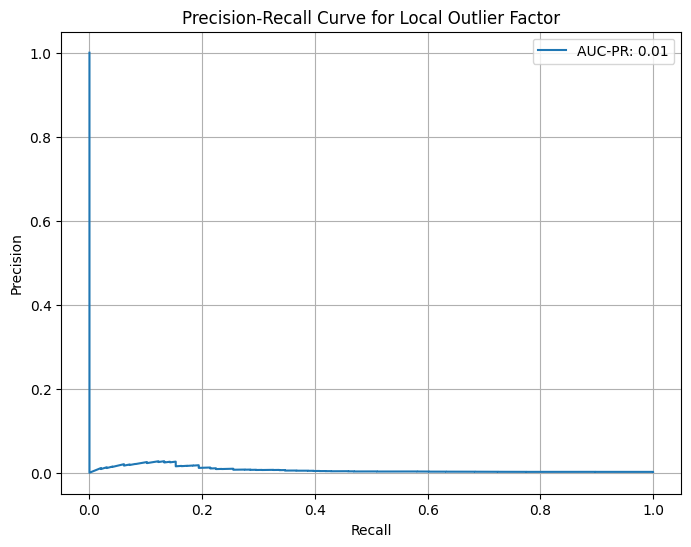

In [27]:
## Local Outlier Factor

# Use the resampled non-fraudulent data for LOF training
X_non_fraud = X_resampled[Y_resampled == 0]

# Initialize and train Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.172, novelty=True)
lof.fit(X_non_fraud)

# Predict on the test set
Y_pred_lof = lof.predict(X_test)
# Convert LOF outputs (-1 for anomaly, 1 for inlier) to binary classification
Y_pred = np.where(Y_pred_lof == -1, 1, 0)

# Calculate anomaly scores for AUC-PR evaluation
Y_scores = -lof.decision_function(X_test)  # Negative scores indicate higher anomaly likelihood

# Classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Precision-Recall Curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(Y_test, Y_scores)
auc_pr = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUC-PR: {auc_pr:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Local Outlier Factor")
plt.legend()
plt.grid()
plt.show()

Params: n_neighbors=10, contamination=0.01, AUC-PR=0.0113
Params: n_neighbors=10, contamination=0.05, AUC-PR=0.0113
Params: n_neighbors=10, contamination=0.1, AUC-PR=0.0113
Params: n_neighbors=20, contamination=0.01, AUC-PR=0.0063
Params: n_neighbors=20, contamination=0.05, AUC-PR=0.0063
Params: n_neighbors=20, contamination=0.1, AUC-PR=0.0063
Params: n_neighbors=30, contamination=0.01, AUC-PR=0.0066
Params: n_neighbors=30, contamination=0.05, AUC-PR=0.0066
Params: n_neighbors=30, contamination=0.1, AUC-PR=0.0066

Best Parameters: {'n_neighbors': 10, 'contamination': 0.05}
Best AUC-PR: 0.011303700598384137


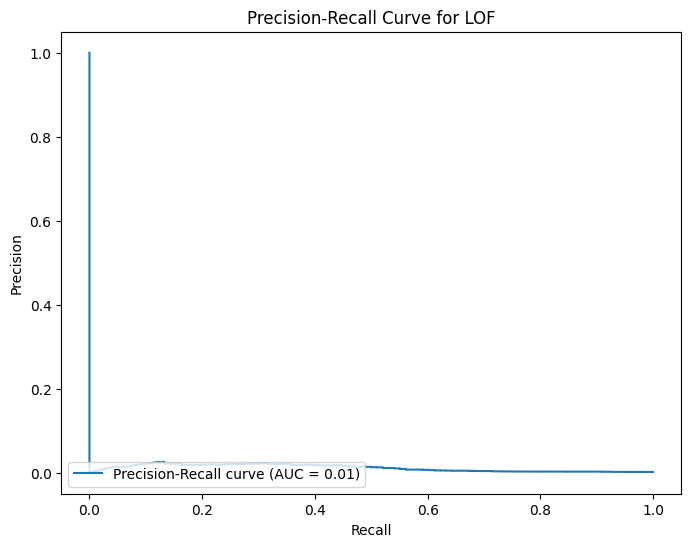

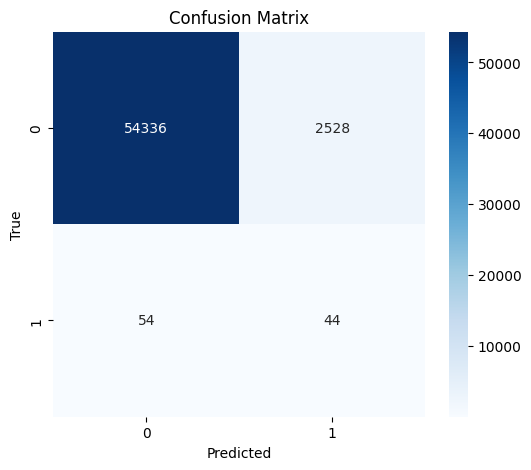

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.02      0.45      0.03        98

    accuracy                           0.95     56962
   macro avg       0.51      0.70      0.50     56962
weighted avg       1.00      0.95      0.98     56962



In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_neighbors': [10, 20, 30],  # Number of neighbors for density estimation
    'contamination': [0.01, 0.05, 0.1]  # Proportion of anomalies in the dataset
}

# Best parameters tracker
best_auc_pr = 0
best_params = None
best_model = None

# Perform manual grid search
for n_neighbors in param_grid['n_neighbors']:
    for contamination in param_grid['contamination']:
        # Initialize Local Outlier Factor
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)
        lof.fit(X_non_fraud_scaled)  # Train only on non-fraud data

        # Predict on the test set
        Y_scores = -lof.decision_function(X_test)  # Negative scores indicate higher anomaly likelihood
        Y_pred = lof.predict(X_test)
        Y_pred = np.where(Y_pred == -1, 1, 0)  # Convert -1 to 1 (fraud), 1 to 0 (non-fraud)

        # Calculate AUC-PR
        precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
        auc_pr = auc(recall, precision)

        print(f"Params: n_neighbors={n_neighbors}, contamination={contamination}, AUC-PR={auc_pr:.4f}")

        # Track the best model
        if auc_pr > best_auc_pr:
            best_auc_pr = auc_pr
            best_params = {'n_neighbors': n_neighbors, 'contamination': contamination}
            best_model = lof

# Output the best parameters
print("\nBest Parameters:", best_params)
print("Best AUC-PR:", best_auc_pr)

# Evaluate the best model
Y_scores = -best_model.decision_function(X_test)
Y_pred = best_model.predict(X_test)
Y_pred = np.where(Y_pred == -1, 1, 0)

# Precision-Recall Curve and AUC-PR
precision, recall, thresholds = precision_recall_curve(Y_test, Y_scores)
auc_pr = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LOF')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

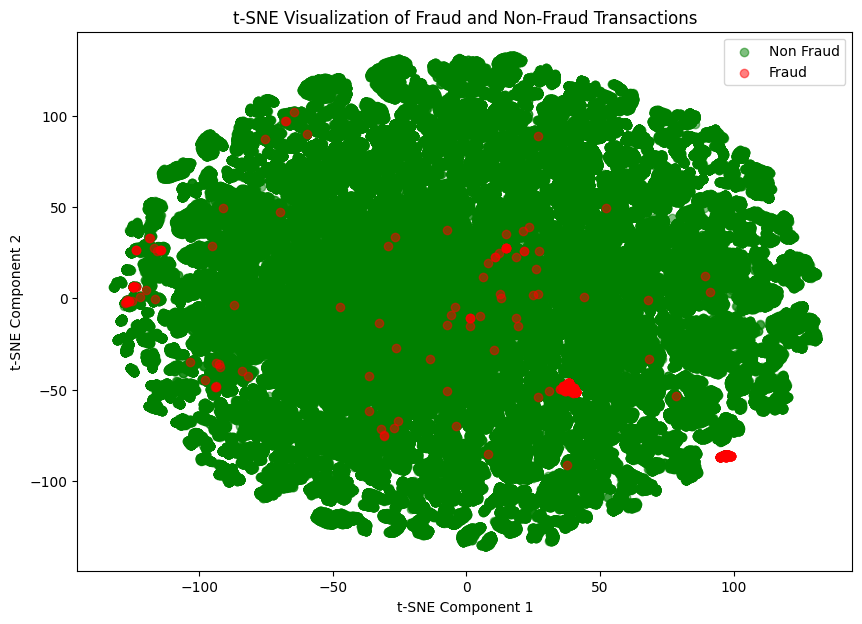

Limiting the dataset to 2000 non-fraudulent samples is essential for training the autoencoder. This ensures that the model focuses on learning the patterns of normal transactions without being overwhelmed by excessive data since there are many non-fraud transactions which are very close to fraud transactions.
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6904 - val_loss: 0.4750
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4901 - val_loss: 0.3336
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3368 - val_loss: 0.2273
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2258 - val_loss: 0.1554
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1537 - val_loss: 0.1080
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1055 - val_loss: 0.0781
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0764 - val_loss: 0.0625
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0615 - val_loss: 0.0534
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━

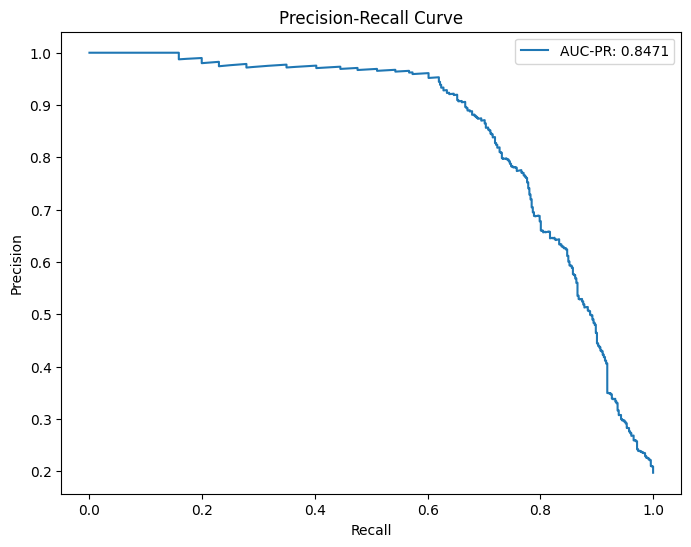

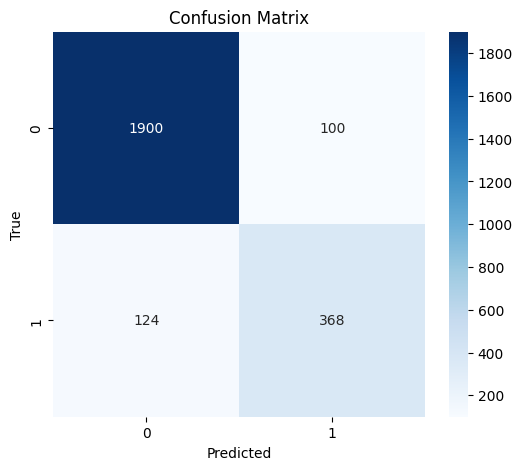

In [18]:
# Auto Encoders

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, classification_report
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[Y == 0, 0], tsne_results[Y == 0, 1], label='Non Fraud', alpha=0.5, c='green')
plt.scatter(tsne_results[Y == 1, 0], tsne_results[Y == 1, 1], label='Fraud', alpha=0.5, c='red')
plt.title('t-SNE Visualization of Fraud and Non-Fraud Transactions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Explanation of limiting to 2000 samples
print("Limiting the dataset to 2000 non-fraudulent samples is essential for training the autoencoder. This ensures that the model focuses on learning the patterns of normal transactions without being overwhelmed by excessive data since there are many non-fraud transactions which are very close to fraud transactions.")

non_fraud = data[data['Class'] == 0].sample(2000, random_state=42)
fraud = data[data['Class'] == 1]

df = pd.concat([non_fraud, fraud]).sample(frac=1, random_state=42).reset_index(drop=True)
X = df.drop(['Class'], axis=1).values
Y = df['Class'].values

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_non_fraud = X_scaled[Y == 0]
X_fraud = X_scaled[Y == 1]

# Define autoencoder architecture
input_layer = Input(shape=(X.shape[1],))

# Encoding part
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(1e-4))(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoding part
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)

# Output layer
output_layer = Dense(X.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mae')

# Train the autoencoder
autoencoder.fit(
    X_non_fraud[:2000], X_non_fraud[:2000],
    batch_size=256,
    epochs=20,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

# Create a hidden representation model
hidden_representation = Model(inputs=autoencoder.input, outputs=encoded)

# Get hidden representations for normal and fraudulent samples
norm_hid_rep = hidden_representation.predict(X_non_fraud)
fraud_hid_rep = hidden_representation.predict(X_fraud)

# Reconstruct and calculate reconstruction error
reconstructions = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Determine the threshold using the 95th percentile
threshold = np.percentile(reconstruction_errors[Y == 0], 95)

# Predict anomalies
y_pred = (reconstruction_errors > threshold).astype(int)

# Evaluate the model
precision, recall, _ = precision_recall_curve(Y, reconstruction_errors)
auc_pr = auc(recall, precision)

print(f'AUC-PR: {auc_pr:.4f}')
print('Classification Report:')
print(classification_report(Y, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR: {auc_pr:.4f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(Y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()